In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import seaborn as sns


In [2]:
def Extract(dataset):
    return pd.read_csv(dataset)


df = Extract("House_Price_dataset.csv")

In [3]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


<div class='alert alert-block alert-success'>
    <b>Success</b>: This box indicates a successful action.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### BASIC INFOS

In [4]:
def Colsinfo(dataframe):
    print("Column details :\n")
    print(dataframe.info())

def BStats(dataframe):
    print("Basic Statisitcs:")
    print(dataframe.describe())

Colsinfo(df)

Column details :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type  

In [5]:
BStats(df)

Basic Statisitcs:
        property_id    location_id         price       latitude  \
count  1.684460e+05  168446.000000  1.684460e+05  168446.000000   
mean   1.559626e+07    4375.936395  1.776576e+07      29.859519   
std    2.251207e+06    3776.561581  3.531003e+07       3.807870   
min    8.657500e+04       1.000000  0.000000e+00      11.052446   
25%    1.488320e+07    1058.000000  1.750000e+05      24.948536   
50%    1.665851e+07    3286.000000  8.500000e+06      31.459784   
75%    1.708662e+07    7220.000000  1.950000e+07      33.560887   
max    1.735772e+07   14220.000000  2.000000e+09      73.184088   

           longitude          baths       bedrooms      Area Size  
count  168446.000000  168446.000000  168446.000000  168446.000000  
mean       71.239804       2.874227       3.179422       5.892188  
std         3.133042       2.463400       1.971401       5.778327  
min        25.906027       0.000000       0.000000       0.000000  
25%        67.130363       0.000000   

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### OUTLIEARS CHECK

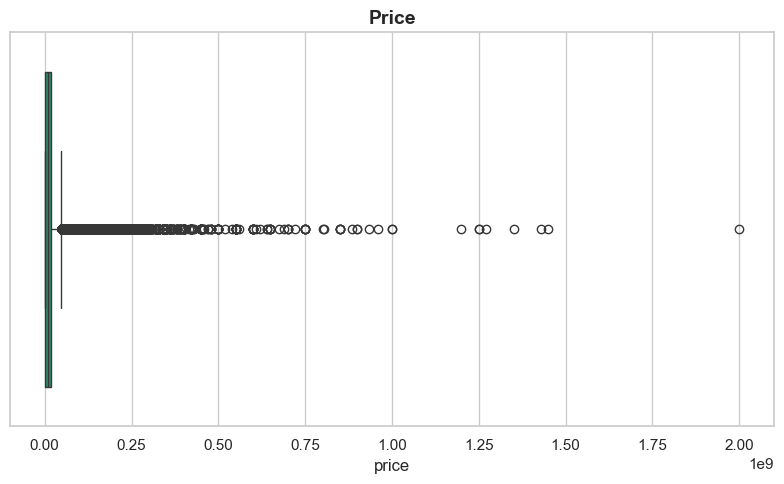

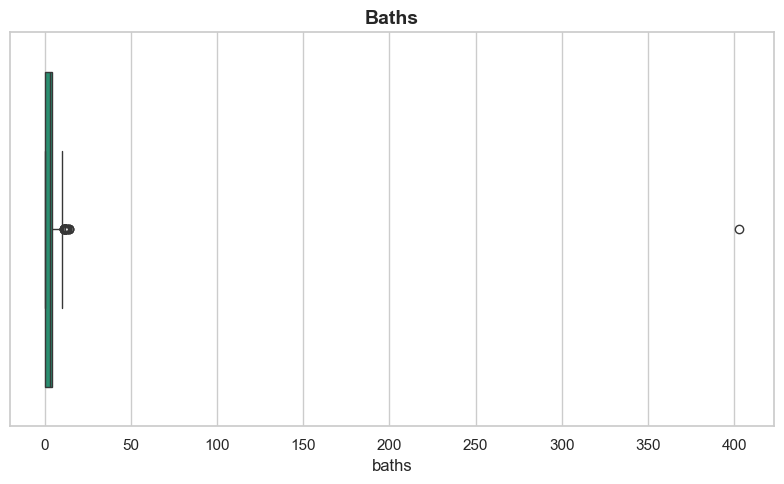

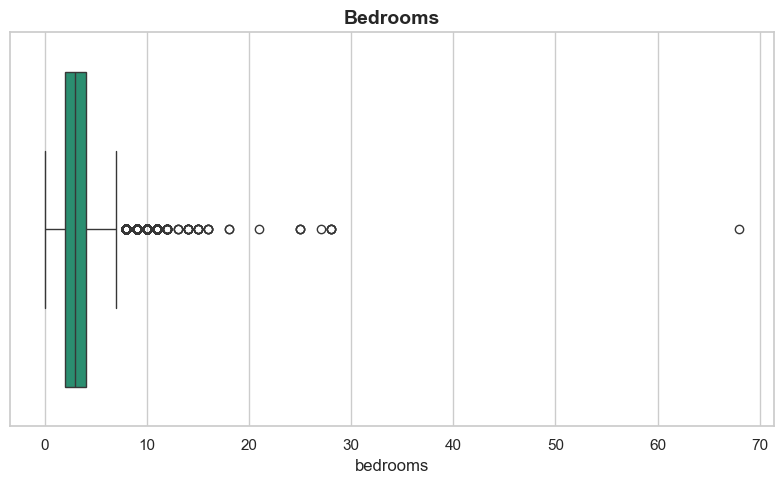

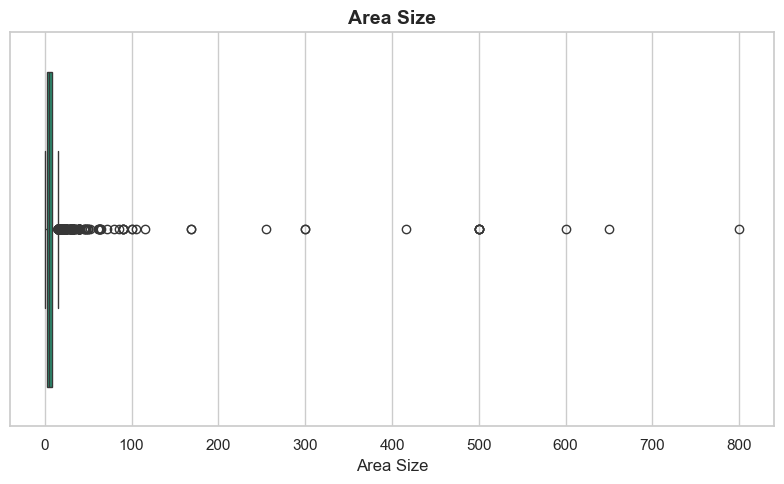

In [6]:
from plots import BoxPlot, set_style

set_style()

cols = ['price', 'baths', 'bedrooms', 'Area Size']
names = ['Price', 'Baths', 'Bedrooms', 'Area Size']

for col, name in zip(cols, names):
    BoxPlot(df[col], title=name)


Boxplots flag outliers statistically, but not all are noise if they appear dense, they may represent a valid subgroup. Violin plots reveal distribution shape, helping us distinguish between scattered anomalies to remove and clustered outliers worth keeping.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### WHAT IF NOISE ARE DENSE, USING VOILIN PLOT TO SEE

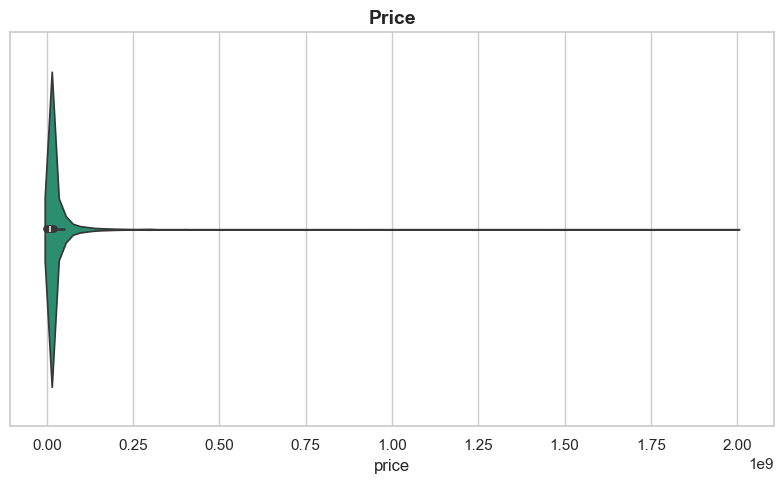

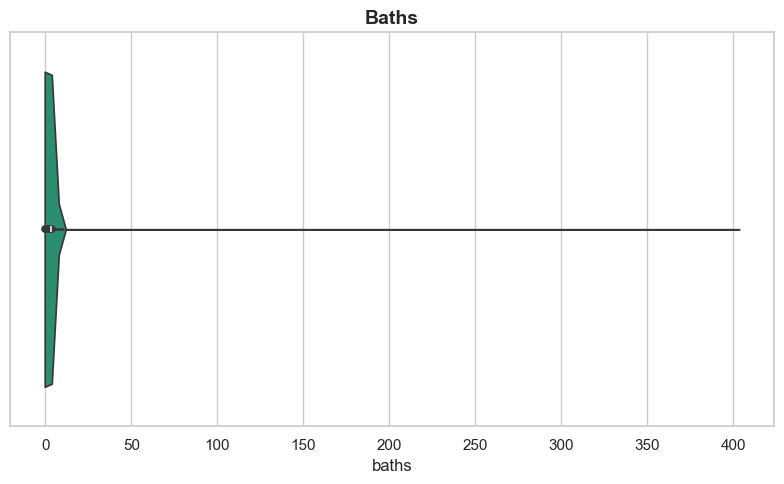

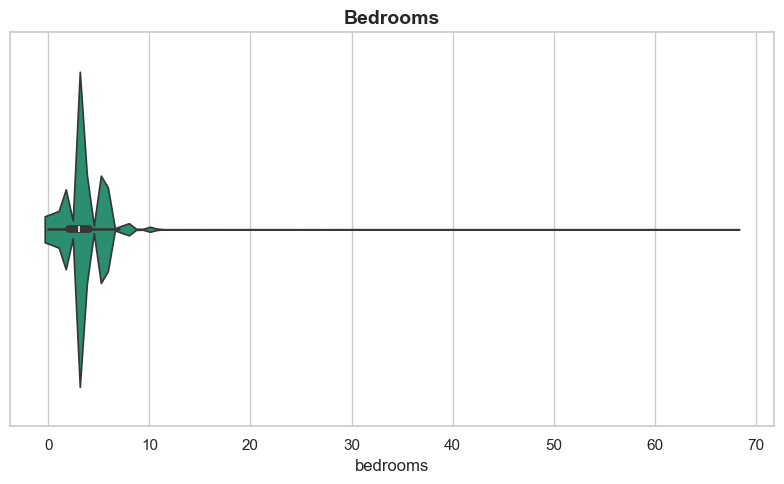

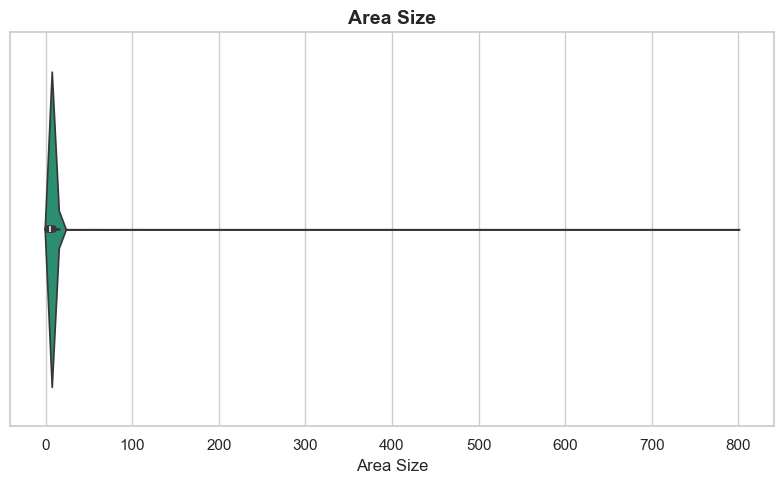

In [11]:
from plots import ViolinPlot

for col, name in zip(cols, names):
    ViolinPlot(df[col], title=name)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### TREND ANALYSIS

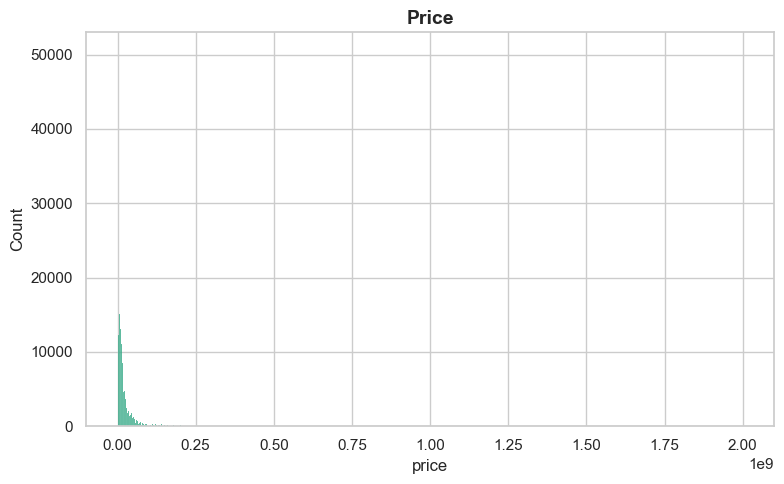

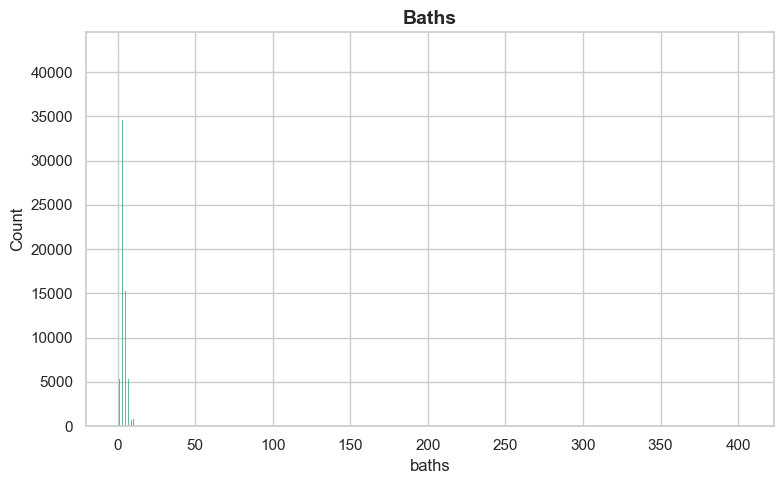

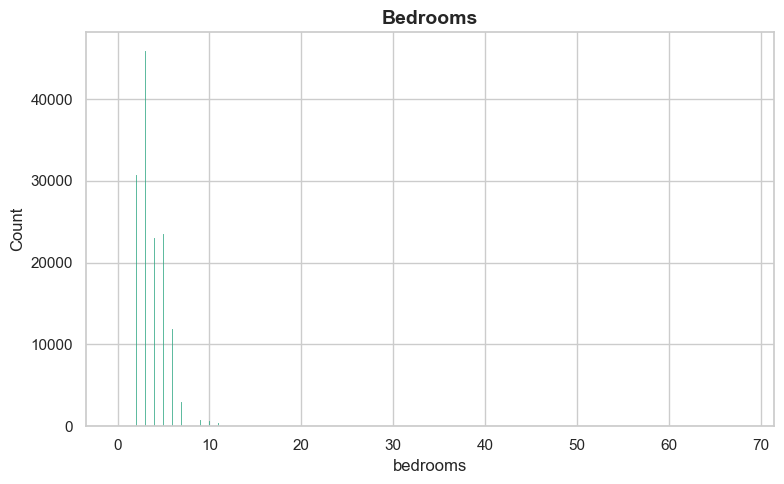

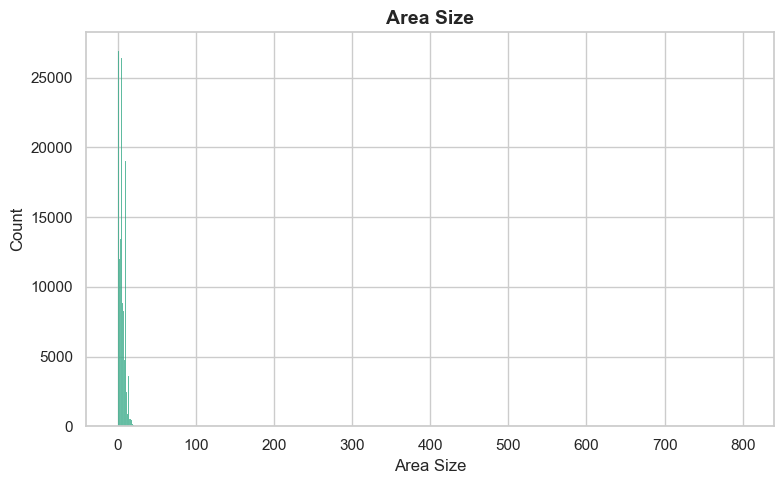

In [9]:
from plots import HistogramPlot

for col, name in zip(cols, names):
    HistogramPlot(df[col], title=name)
